<a href="https://colab.research.google.com/github/AlbertoVentura8/AnalisisDataset/blob/main/MarchMad_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Permiso para exportar desde Drive
from google.colab import auth
auth.authenticate_user()

from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Voy a cargar las librerías que vamos a usar a lo largo del EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [3]:
#Hacemos la carga del dataset. Dataset previamente subido a GoogleColab.
March_Madness_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1VRodxJqhnl2IK63lmumPhLwhRDe6Y2Gu')

In [4]:
# Para ver que la carga ha sido correcta, cargamos el head del mismo
March_Madness_df.head()


,Unnamed: 0,Season,Team Name,Conference,Adjusted Temo,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Avg Possession Length (Offense),Avg Possession Length (Defense),eFGPct,...,SFOR,SGOR,PGOR,CenterDR,PFDR,SFDR,SGDR,PGDR,Net Rating,Is_Champion
0,0,2019,Virginia,Atlantic Coast Conference (ACC),59.4,123.4,89.2,21.0,18.8,0.551800,...,14.67,8.82,8.61,23.45,26.61,18.51,17.84,13.59,34.2,Si
1,1,2021,Baylor,Big 12 Conference,67.4,125.0,91.1,17.0,17.6,0.565483,...,15.00,7.14,5.21,30.09,27.69,14.23,16.34,11.65,33.9,Si
2,2,2015,Wisconsin,Big Ten Conference (Big 10),58.7,129.0,95.2,21.8,18.3,0.547518,...,29.46,9.31,11.50,33.03,20.78,22.11,11.68,12.40,33.8,No
3,3,2018,Villanova,Big East Conference,68.7,127.8,94.0,17.9,16.6,0.595082,...,19.54,9.99,4.45,29.62,19.16,19.99,17.28,13.94,33.8,Si
4,4,2011,Ohio State,Big Ten Conference (Big 10),63.8,125.0,91.5,17.1,20.1,0.563137,...,15.64,14.62,9.35,35.97,17.52,15.71,16.02,14.77,33.5,No Llega


In [5]:
#Eliminar columna Unnamed0
del March_Madness_df['Unnamed: 0']
March_Madness_df.head()

,Season,Team Name,Conference,Adjusted Temo,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Avg Possession Length (Offense),Avg Possession Length (Defense),eFGPct,TOPct,...,SFOR,SGOR,PGOR,CenterDR,PFDR,SFDR,SGDR,PGDR,Net Rating,Is_Champion
0,2019,Virginia,Atlantic Coast Conference (ACC),59.4,123.4,89.2,21.0,18.8,0.551800,0.147067,...,14.67,8.82,8.61,23.45,26.61,18.51,17.84,13.59,34.2,Si
1,2021,Baylor,Big 12 Conference,67.4,125.0,91.1,17.0,17.6,0.565483,0.165283,...,15.00,7.14,5.21,30.09,27.69,14.23,16.34,11.65,33.9,Si
2,2015,Wisconsin,Big Ten Conference (Big 10),58.7,129.0,95.2,21.8,18.3,0.547518,0.123664,...,29.46,9.31,11.50,33.03,20.78,22.11,11.68,12.40,33.8,No
3,2018,Villanova,Big East Conference,68.7,127.8,94.0,17.9,16.6,0.595082,0.150455,...,19.54,9.99,4.45,29.62,19.16,19.99,17.28,13.94,33.8,Si
4,2011,Ohio State,Big Ten Conference (Big 10),63.8,125.0,91.5,17.1,20.1,0.563137,0.157759,...,15.64,14.62,9.35,35.97,17.52,15.71,16.02,14.77,33.5,No Llega


**Vamos a empezar este bloque de Análisis Exploratorio del Dataset (EDA)**



1.   **En este primer bloque, vamos a echar un vistazo por las variables, y su correlación, con la variable objetivo que es si un equipo es campeón, finalista o no llega a la final.**





In [6]:
#Vamos a ver las columnas del dataset, y el tipo de datos que contienen, en su mayoría, son datos numéricos, excepto alguna columna de texto
March_Madness_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6966 entries, 0 to 6965
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Season                           6966 non-null   int64  
 1   Team Name                        6966 non-null   object 
 2   Conference                       6966 non-null   object 
 3   Adjusted Temo                    6966 non-null   float64
 4   Adjusted Offensive Efficiency    6966 non-null   float64
 5   Adjusted Defensive Efficiency    6966 non-null   float64
 6   Avg Possession Length (Offense)  6966 non-null   float64
 7   Avg Possession Length (Defense)  6966 non-null   float64
 8   eFGPct                           6966 non-null   float64
 9   TOPct                            6966 non-null   float64
 10  ORPct                            6966 non-null   float64
 11  OffFT                            6966 non-null   float64
 12  DefFT               

In [7]:
# Para poder usar la columna Is_Champion como variable objetivo y crear correlaciones, lo más fácil va a ser darle un valor a cada texto
# Convertir la columna 'Is_Champion' en valores numéricos, para poder ver correlaciones
March_Madness_df['Is_Champion_Num'] = March_Madness_df['Is_Champion'].map({
    'Si': 2,
    'No': 1,  # Usamos 1 para finalista si existiera
    'No Llega': 0
})
March_Madness_df.head()

,Season,Team Name,Conference,Adjusted Temo,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Avg Possession Length (Offense),Avg Possession Length (Defense),eFGPct,TOPct,...,SGOR,PGOR,CenterDR,PFDR,SFDR,SGDR,PGDR,Net Rating,Is_Champion,Is_Champion_Num
0,2019,Virginia,Atlantic Coast Conference (ACC),59.4,123.4,89.2,21.0,18.8,0.551800,0.147067,...,8.82,8.61,23.45,26.61,18.51,17.84,13.59,34.2,Si,2
1,2021,Baylor,Big 12 Conference,67.4,125.0,91.1,17.0,17.6,0.565483,0.165283,...,7.14,5.21,30.09,27.69,14.23,16.34,11.65,33.9,Si,2
2,2015,Wisconsin,Big Ten Conference (Big 10),58.7,129.0,95.2,21.8,18.3,0.547518,0.123664,...,9.31,11.50,33.03,20.78,22.11,11.68,12.40,33.8,No,1
3,2018,Villanova,Big East Conference,68.7,127.8,94.0,17.9,16.6,0.595082,0.150455,...,9.99,4.45,29.62,19.16,19.99,17.28,13.94,33.8,Si,2
4,2011,Ohio State,Big Ten Conference (Big 10),63.8,125.0,91.5,17.1,20.1,0.563137,0.157759,...,14.62,9.35,35.97,17.52,15.71,16.02,14.77,33.5,No Llega,0


In [8]:
# Vamos a tener una vista general de todas las variables, y de los principales puntos de cada una: Media, Desviación, Mínimo, Cuartiles y Máximo.
March_Madness_df.describe()

,Season,Adjusted Temo,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Avg Possession Length (Offense),Avg Possession Length (Defense),eFGPct,TOPct,ORPct,OffFT,...,SFOR,SGOR,PGOR,CenterDR,PFDR,SFDR,SGDR,PGDR,Net Rating,Is_Champion_Num
count,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,...,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000,6966.000000
mean,2014.633218,66.443526,103.669825,103.690970,17.715030,17.649699,0.495542,0.195650,0.305447,19.810313,...,17.711380,11.372326,8.260563,26.282044,24.030046,19.346767,16.093491,14.086440,-0.021146,0.006604
std,5.758004,3.212785,7.376295,6.433883,1.444842,0.997079,0.036065,0.039127,0.045639,2.714567,...,5.874756,4.538484,3.618828,4.569481,4.119360,3.652779,3.301386,3.371309,11.975658,0.102864
min,2005.000000,51.600000,71.500000,84.100000,0.000000,0.000000,0.000000,0.119000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.100000,0.000000
25%,2010.000000,64.400000,98.600000,99.300000,16.900000,17.200000,0.475587,0.177766,0.275913,18.016371,...,13.510000,8.070000,5.860000,23.440000,21.512500,16.970000,13.980000,12.150000,-8.600000,0.000000
50%,2015.000000,66.400000,103.600000,103.900000,17.700000,17.600000,0.496321,0.193177,0.307263,19.845230,...,17.400000,10.780000,7.700000,26.040000,23.880000,19.160000,15.910000,13.810000,-0.800000,0.000000
75%,2020.000000,68.600000,108.700000,108.400000,18.500000,18.100000,0.516768,0.210073,0.337041,21.620393,...,21.600000,14.000000,10.017500,28.880000,26.440000,21.590000,17.940000,15.730000,8.400000,0.000000
max,2024.000000,89.700000,129.000000,125.000000,23.800000,21.100000,0.603448,1.000000,0.452567,32.282300,...,99.980000,39.840000,99.980000,99.960000,99.960000,52.900000,80.800000,99.970000,34.200000,2.000000


In [9]:
# Vamos a comprobar que la limpieza está hecha correctamente, y que no tenemos valores nulos.
March_Madness_df.isna().sum()

,0
Season,0
Team Name,0
Conference,0
Adjusted Temo,0
Adjusted Offensive Efficiency,0
Adjusted Defensive Efficiency,0
Avg Possession Length (Offense),0
Avg Possession Length (Defense),0
eFGPct,0
TOPct,0


In [10]:
# Viendo que está todo en orden para empezar a trabajar, vamos con una vista un poco más estadística del dataset
March_Madness_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Season,6966.0,2014.633218,5.758004,2005.000000,2010.000000,2015.000000,2020.000000,2024.000000
Adjusted Temo,6966.0,66.443526,3.212785,51.600000,64.400000,66.400000,68.600000,89.700000
Adjusted Offensive Efficiency,6966.0,103.669825,7.376295,71.500000,98.600000,103.600000,108.700000,129.000000
Adjusted Defensive Efficiency,6966.0,103.690970,6.433883,84.100000,99.300000,103.900000,108.400000,125.000000
Avg Possession Length (Offense),6966.0,17.715030,1.444842,0.000000,16.900000,17.700000,18.500000,23.800000
Avg Possession Length (Defense),6966.0,17.649699,0.997079,0.000000,17.200000,17.600000,18.100000,21.100000
eFGPct,6966.0,0.495542,0.036065,0.000000,0.475587,0.496321,0.516768,0.603448
TOPct,6966.0,0.195650,0.039127,0.119000,0.177766,0.193177,0.210073,1.000000
ORPct,6966.0,0.305447,0.045639,0.000000,0.275913,0.307263,0.337041,0.452567
OffFT,6966.0,19.810313,2.714567,0.000000,18.016371,19.845230,21.620393,32.282300


In [11]:
# Seleccionar solo las columnas numéricas
Col_Num = March_Madness_df.select_dtypes(include=['number'])

# Calcular el sesgo (skew) para todas las columnas numéricas
skew_values = Col_Num.skew()

# Ordenar los valores de sesgo en orden descendente
sorted_skew_values = skew_values.sort_values(ascending=False)

# Mostrar las columnas con las mayores desviaciones
print(sorted_skew_values)

OppBlockPct                        19.148628
Is_Champion_Num                    16.960902
TOPct                              12.507153
OppFG3Pct                           9.664458
PGDR                                7.353209
DE                                  4.612755
OppFG2Pct                           3.426781
PGOR                                3.292930
OppFTPct                            1.581845
SGDR                                1.318885
SGOR                                0.914896
PFDR                                0.732610
SFOR                                0.691189
CenterDR                            0.556840
BlockPct                            0.509900
EffectiveHeight                     0.244330
SFDR                                0.198562
AdjEM                               0.166372
Net Rating                          0.166226
AdjTempo                            0.053180
Adjusted Temo                       0.052562
CenterOR                            0.050052
AdjOE     

Esto, nos informa de que variables son las menos simétricas. Las que tienen un skew positivo, tienen más valores hacia la derecha, y los valores negativos hacia la izquierda. Vemos por ejemplo que la columna Is_Champion, está claramente desviada ya que tiene muchos valores con 0-"No llega".

In [12]:
# Vemos un pequeño resumen de los valores más altos y más bajos de correlación. A mayor proximidad a 1, significa que si incrementan, el Net Rating lo hará también, y cuanto mayor proximidad a -1, si aumenta esa variable, el Net Rating disminuirá
Col_Num.corr()['Is_Champion_Num'].sort_values(ascending=False)

,Is_Champion_Num
Is_Champion_Num,1.000000
Net Rating,0.158635
AdjEM,0.158607
Adjusted Offensive Efficiency,0.146761
AdjOE,0.146694
OE,0.110602
eFGPct,0.084168
FG2Pct,0.077774
FG3Pct,0.068490
ORPct,0.066319


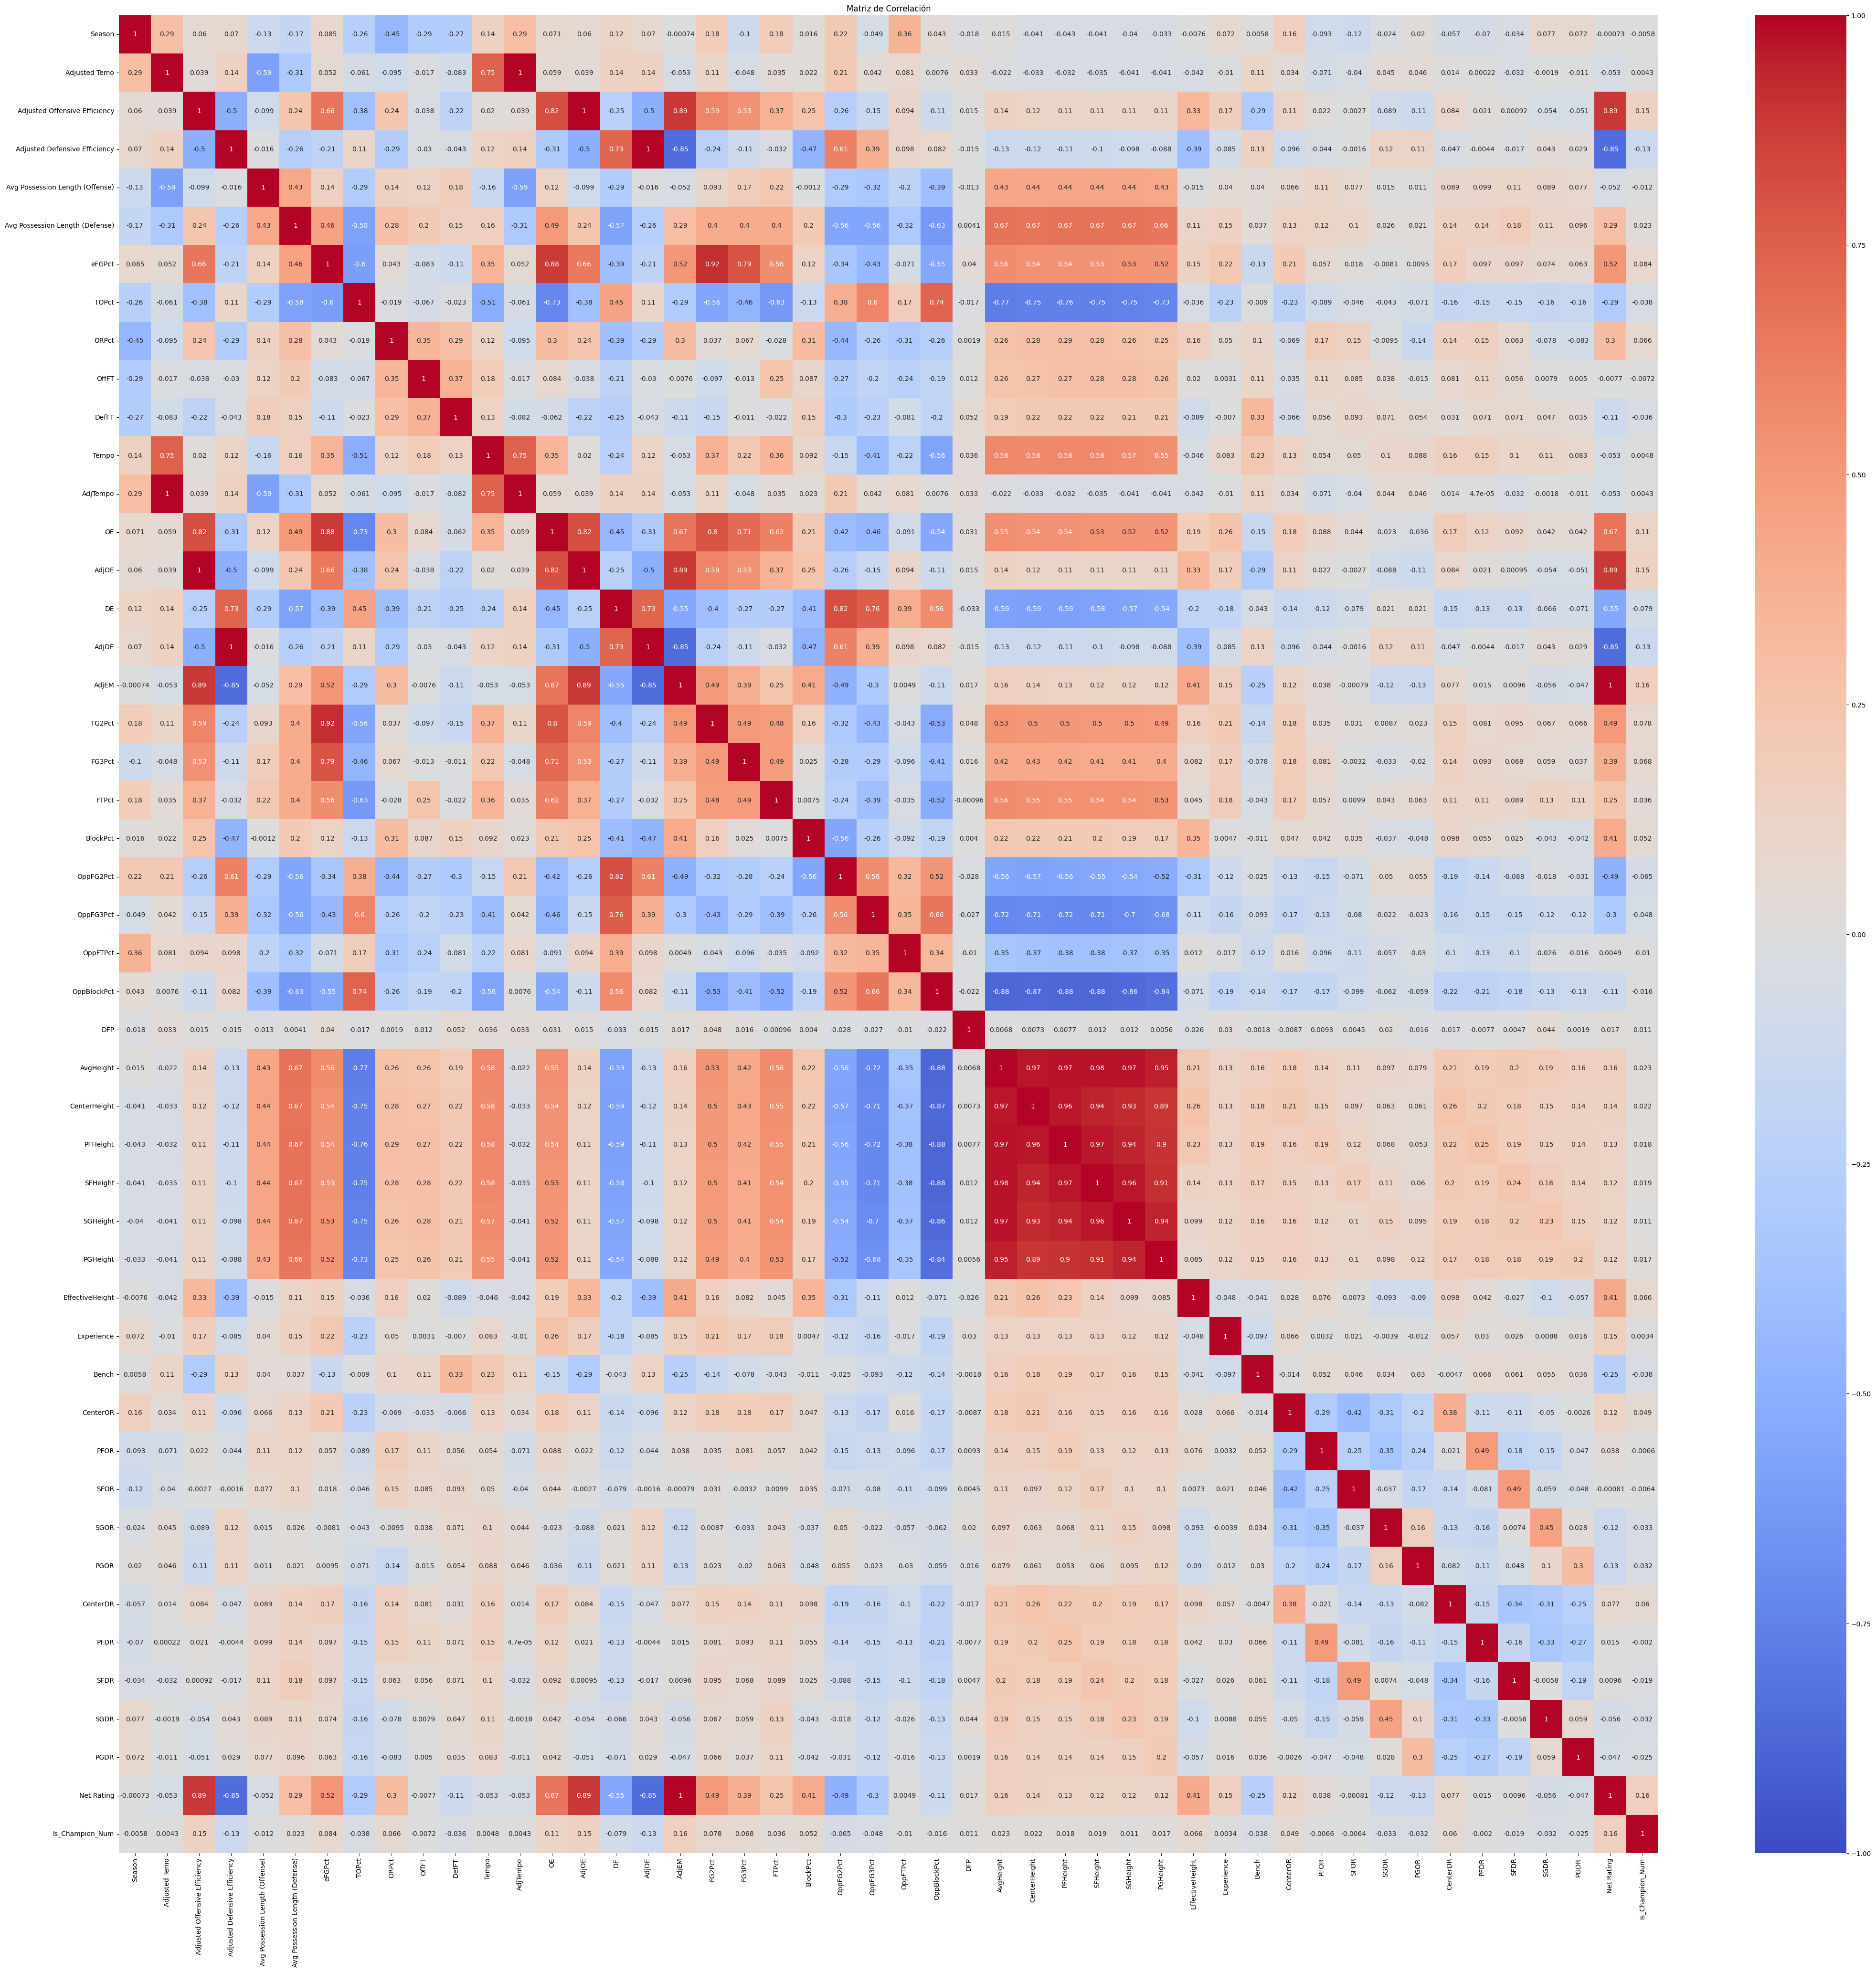

In [13]:
# Calcular la matriz de correlación
MarchMad_corr = Col_Num.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(52, 50))

# Crear el mapa de calor
sns.heatmap(MarchMad_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Ajustar el título y mostrar el gráfico
plt.title('Matriz de Correlación')
plt.show()

El tamaño de la matriz de correlación es bastante grande, pero con el mapa de calor nos hacemos una idea de como se distribuye esta variable, es una visual bastante útil.

In [14]:
# Por último en esta primera parte que nos da una idea general, vamos a ver cuantos equipos distintos hay para analizar
March_Madness_df['Team Name'].nunique()
print("Equipos distintos a lo largo de estos últimos 20 años: ", March_Madness_df['Team Name'].nunique())

Equipos distintos a lo largo de estos últimos 20 años:  362



2.  **En este segundo bloque, vamos a centrarnos en analizar unas cuantas variables.**



Conferencias distintas:  33
Equipos por conferencia:  Conference
Atlantic 10 Conference (A-10)                15
Atlantic Coast Conference (ACC)              15
American Athletic Conference (AAC)           14
Big 12 Conference                            14
Sun Belt Conference (SBC)                    14
Southeastern Conference (SEC)                14
Big Ten Conference (Big 10)                  14
Coastal Athletic Association (CAA)           14
Mid-American Conference (MAC)                12
Atlantic Sun Conference (ASUN)               12
Southwestern Conference (SWC)                12
Pac-12 Conference                            12
Missouri Valley Conference (MVC)             12
Ohio Valley Conference (OVC, The Valley)     11
Mountain West Conference (MW)                11
Metro Atlantic Athletic Conference (MAAC)    11
Western Athletic Conference (WAC)            11
Big West Conference (BWC)                    11
Big East Conference                          11
Horizon League         

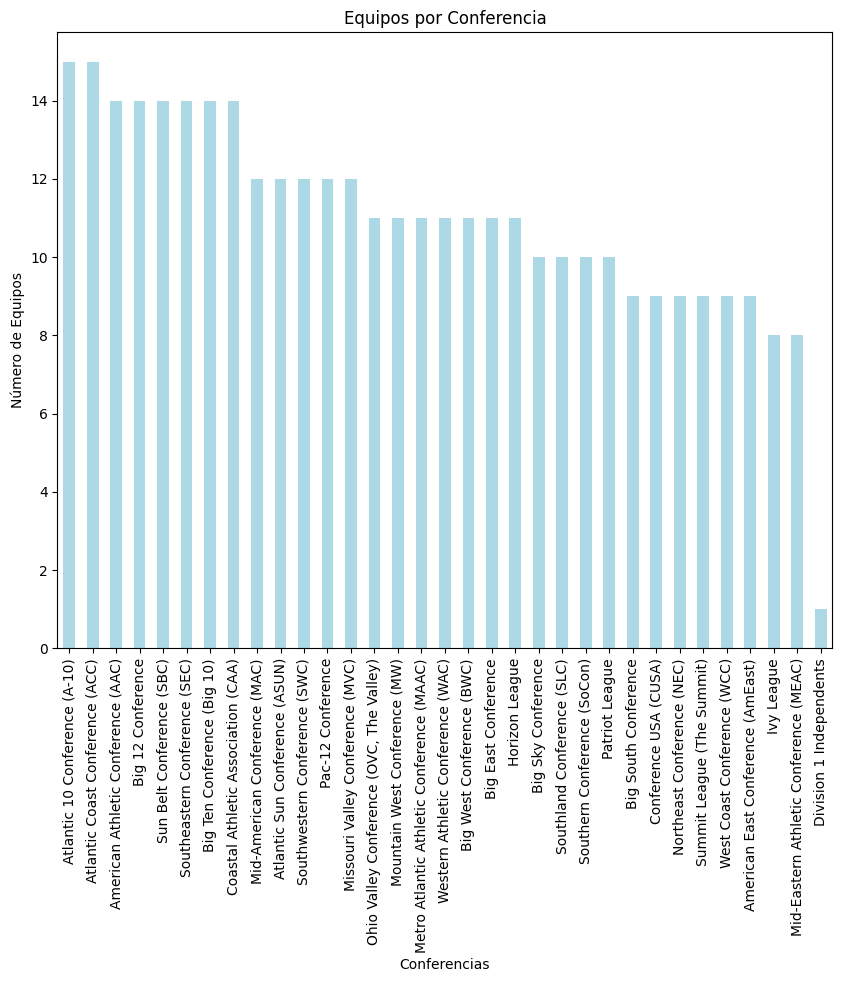

Figure(1000x800)


In [15]:
# Vamos a ver cuantas conferencias distitntas hay, y cuales tienen más equipos.
print("Conferencias distintas: ", March_Madness_df['Conference'].nunique())
equipos_por_conferencia = March_Madness_df.groupby('Conference')['Team Name'].nunique().sort_values(ascending=False)
print("Equipos por conferencia: ",equipos_por_conferencia)

# Voy a meterlo en una visual para que se vea más claro
visual_conf = plt.figure(figsize=(10, 8)); equipos_por_conferencia.plot(kind='bar', color='lightblue'); plt.title('Equipos por Conferencia'); plt.xlabel('Conferencias'); plt.ylabel('Número de Equipos'); plt.show()
print(visual_conf)

Se puede apreciar por el gráfico, quw están bastante escalonadas las conferencias. La única conferencia que llama la atención es la Division 1 Independents que contiene a los Chicago St.

In [16]:
#Aquí comprobamos que es verdad que la division 1 Independents, tiene 1 equipo
March_Madness_df[March_Madness_df['Conference'] == 'Division 1 Independents']

,Season,Team Name,Conference,Adjusted Temo,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Avg Possession Length (Offense),Avg Possession Length (Defense),eFGPct,TOPct,...,SGOR,PGOR,CenterDR,PFDR,SFDR,SGDR,PGDR,Net Rating,Is_Champion,Is_Champion_Num
4348,2007,Chicago State,Division 1 Independents,68.2,107.3,112.1,17.3,17.1,0.481329,0.203228,...,6.34,13.97,30.43,26.14,15.07,16.05,12.32,-4.8,No Llega,0
4615,2009,Chicago State,Division 1 Independents,74.2,106.0,112.0,18.0,17.9,0.513416,0.197927,...,10.82,8.22,27.06,24.48,16.48,16.97,15.01,-6.0,No Llega,0
4822,2006,Chicago State,Division 1 Independents,65.3,101.2,108.1,19.3,19.8,0.474883,0.199015,...,12.82,9.51,25.68,28.08,15.94,15.74,14.56,-6.9,No Llega,0
5116,2005,Chicago State,Division 1 Independents,65.5,97.1,105.2,18.2,16.9,0.478934,0.204189,...,15.17,9.91,25.05,24.00,18.92,16.28,15.75,-8.1,No Llega,0
5351,2008,Chicago State,Division 1 Independents,70.9,102.3,111.6,20.6,18.1,0.498989,0.225742,...,22.79,15.04,24.81,22.44,16.94,21.09,14.73,-9.3,No Llega,0
5520,2024,Chicago State,Division 1 Independents,64.6,100.3,110.4,18.1,17.8,0.461272,0.200819,...,21.86,11.71,24.50,28.51,20.29,16.79,9.88,-10.1,No Llega,0
5569,2023,Chicago State,Division 1 Independents,64.2,102.9,113.3,18.2,17.9,0.487559,0.213276,...,11.92,15.33,18.26,26.97,21.59,16.83,16.25,-10.4,No Llega,0
5744,2014,Chicago State,Division 1 Independents,67.8,98.1,109.4,17.2,17.4,0.468079,0.171434,...,17.84,13.36,31.72,17.91,19.96,18.71,11.70,-11.3,No Llega,0
5956,2013,Chicago State,Division 1 Independents,65.5,91.1,103.7,18.4,16.9,0.443827,0.211766,...,15.39,9.35,30.07,24.15,19.33,14.21,12.24,-12.6,No Llega,0
6528,2022,Chicago State,Division 1 Independents,65.6,95.5,113.1,18.2,17.3,0.458426,0.220622,...,8.09,9.34,24.90,28.32,20.57,11.35,14.86,-17.6,No Llega,0


In [17]:
# Vamos a empezar viendo la evolución anual del conjunto de equipos en cuanto a eficiencia ofensiva y ofensiva.
# Media, mediana y desviación estándar de la eficiencia ofensiva y defensiva
estad_off = March_Madness_df['Adjusted Offensive Efficiency'].agg(['mean', 'median', 'std'])
estad_def = March_Madness_df['Adjusted Defensive Efficiency'].agg(['mean', 'median', 'std'])

print("Eficiencia Ofensiva:")
print(estad_off)

print("Eficiencia Defensiva:")
print(estad_def)


Eficiencia Ofensiva:
mean      103.669825
median    103.600000
std         7.376295
Name: Adjusted Offensive Efficiency, dtype: float64
Eficiencia Defensiva:
mean      103.690970
median    103.900000
std         6.433883
Name: Adjusted Defensive Efficiency, dtype: float64


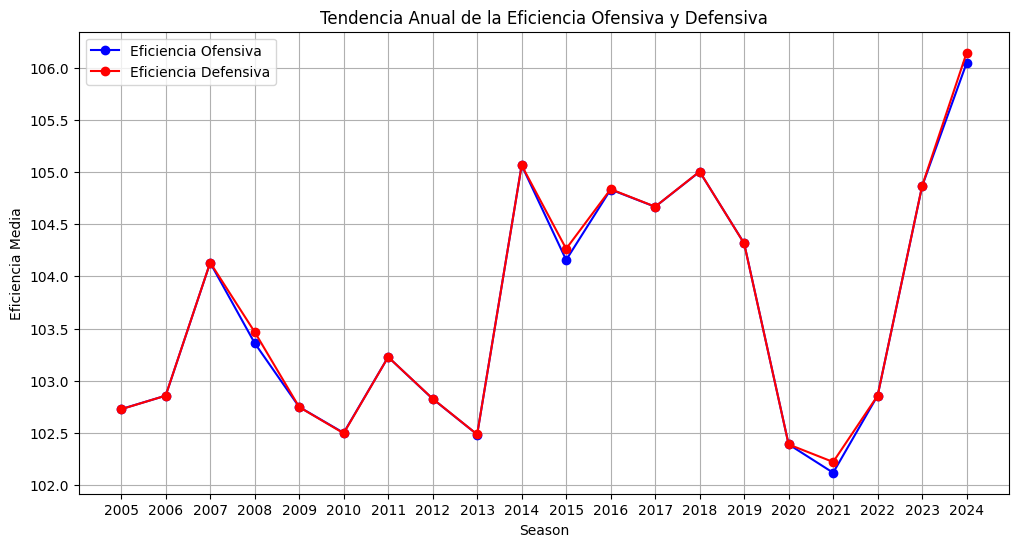

In [18]:
# Calcular la media anual de eficiencia ofensiva y defensiva
mean_offensive_efficiency = March_Madness_df.groupby('Season')['Adjusted Offensive Efficiency'].mean()
mean_defensive_efficiency = March_Madness_df.groupby('Season')['Adjusted Defensive Efficiency'].mean()

plt.figure(figsize=(12, 6))

# Graficar la media de la eficiencia ofensiva
plt.plot(
    mean_offensive_efficiency.index,
    mean_offensive_efficiency,
    linestyle='-', marker='o', label='Eficiencia Ofensiva', color='blue'
)

# Graficar la media de la eficiencia defensiva
plt.plot(
    mean_defensive_efficiency.index,
    mean_defensive_efficiency,
    linestyle='-', marker='o', label='Eficiencia Defensiva', color='red'
)

# Configuraciones del gráfico
plt.title('Tendencia Anual de la Eficiencia Ofensiva y Defensiva')
plt.xlabel('Season')
plt.ylabel('Eficiencia Media')
plt.xticks(mean_offensive_efficiency.index)  # Muestre las temporadas
y_min = min(mean_offensive_efficiency.min(), mean_defensive_efficiency.min())
y_max = max(mean_offensive_efficiency.max(), mean_defensive_efficiency.max())
y_ticks = np.arange(np.floor(y_min), np.ceil(y_max) + 2, 1.5)  # Ajusto los saltos
plt.legend()
plt.grid(True)
# Mostrar el gráfico
plt.show()

El gráfico nos muestra lo que hemos podido ver más arriba al sacar las medias de todas las variables, al final la eficiencia ofensiva y defensiva está muy pareja.

<ipython-input-19-77ba0f203d38>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=March_Madness_df, x='Season', y='Adjusted Offensive Efficiency', palette='viridis')


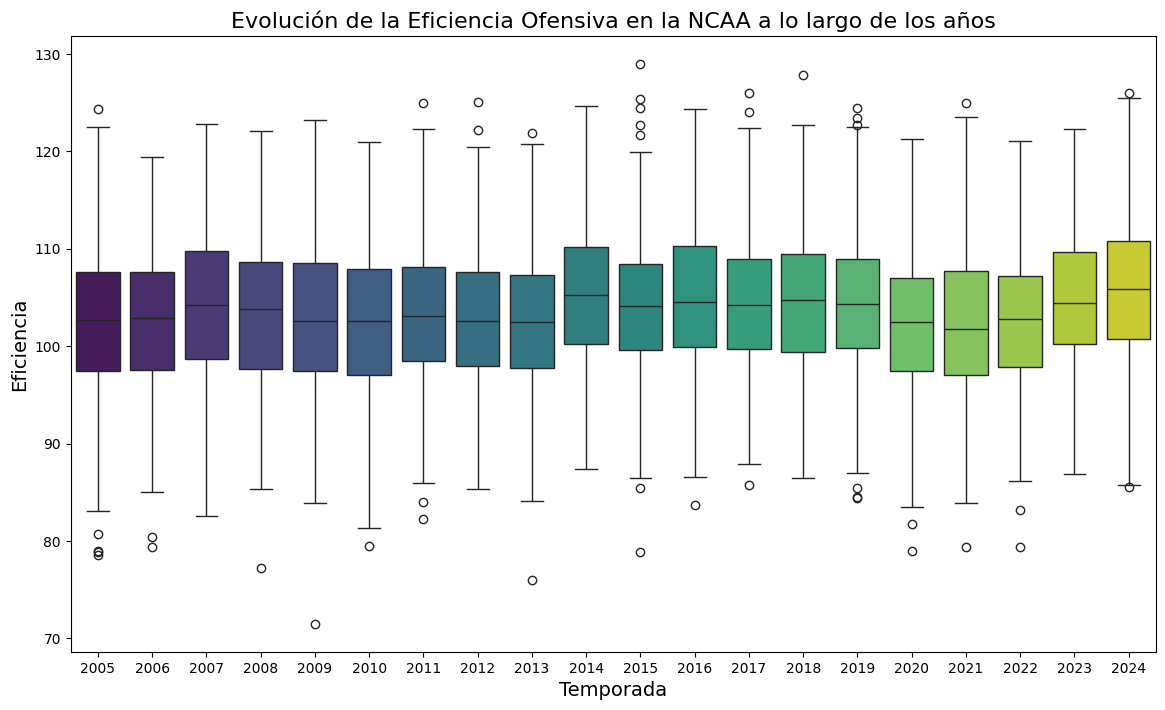

In [19]:
# Vemos un poco más en detalle las tendencias ofensivas y defensivas. Vamos con la Ofensiva
# Crear la figura y los ejes
plt.figure(figsize=(14, 8))

# Nube de puntos para la eficiencia ofensiva a lo largo de los años
sns.boxplot(data=March_Madness_df, x='Season', y='Adjusted Offensive Efficiency', palette='viridis')



# Configurar título y etiquetas de los ejes
plt.title('Evolución de la Eficiencia Ofensiva en la NCAA a lo largo de los años', fontsize=16)
plt.xlabel('Temporada', fontsize=14)
plt.ylabel('Eficiencia', fontsize=14)

# Mostrar gráfico
plt.show()


<ipython-input-20-25bd62a0ff80>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=March_Madness_df, x='Season', y='Adjusted Defensive Efficiency', palette='viridis')


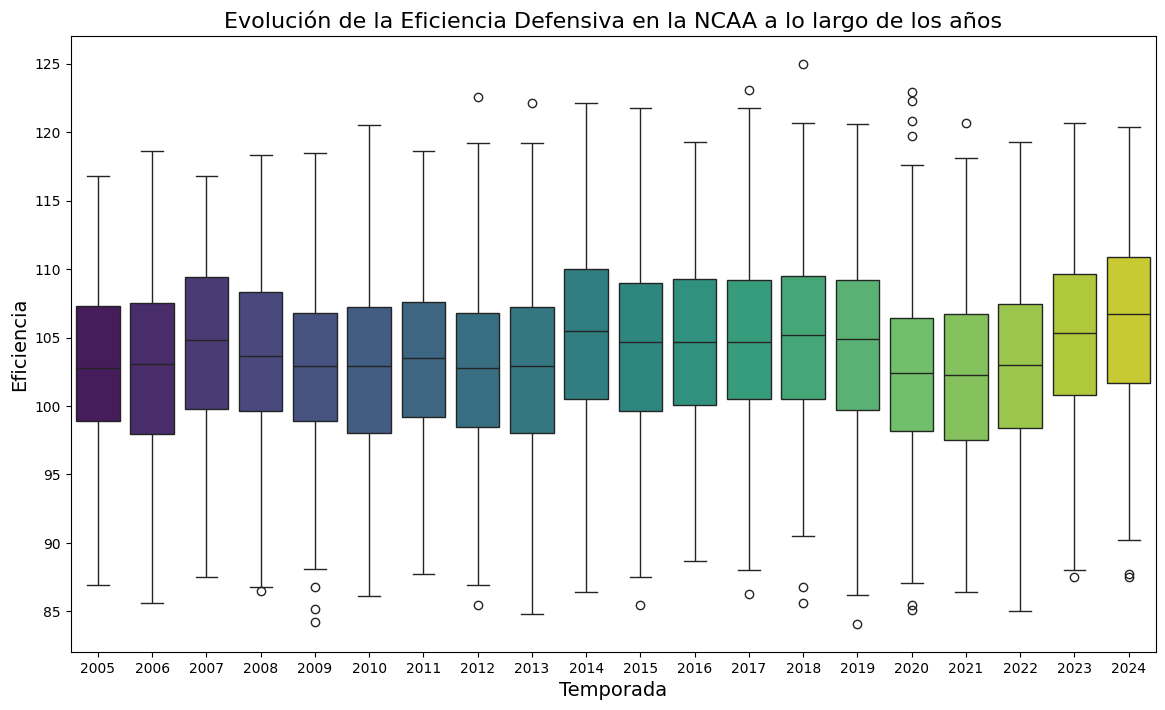

In [20]:
# Vamos ahora con la defensiva
# Crear la figura y los ejes
plt.figure(figsize=(14, 8))

# Nube de puntos para la eficiencia ofensiva a lo largo de los años
sns.boxplot(data=March_Madness_df, x='Season', y='Adjusted Defensive Efficiency', palette='viridis')

# Configurar título y etiquetas de los ejes
plt.title('Evolución de la Eficiencia Defensiva en la NCAA a lo largo de los años', fontsize=16)
plt.xlabel('Temporada', fontsize=14)
plt.ylabel('Eficiencia', fontsize=14)

# Mostrar gráfico
plt.show()

In [21]:
# Vamos a ver cuales han sido los mejores equipos en estas tendencias
# Equipos con mejor eficiencia ofensiva
Top_off = March_Madness_df.sort_values('Adjusted Offensive Efficiency', ascending=False).head(10)

# Equipos con mejor eficiencia defensiva
Top_def = March_Madness_df.sort_values('Adjusted Defensive Efficiency').head(10)

print("Mejores Equipos Ofensivos:")
print(Top_off[['Season', 'Team Name', 'Adjusted Offensive Efficiency']])

print("Mejores Equipos Defensivos:")
print(Top_def[['Season', 'Team Name', 'Adjusted Defensive Efficiency']])


Mejores Equipos Ofensivos:
     Season       Team Name  Adjusted Offensive Efficiency
2      2015       Wisconsin                          129.0
3      2018       Villanova                          127.8
220    2024         Alabama                          126.0
237    2017  Oklahoma State                          126.0
157    2024        Illinois                          125.5
139    2015      Notre Dame                          125.4
26     2024          Purdue                          125.2
126    2012        Missouri                          125.1
1      2021          Baylor                          125.0
4      2011      Ohio State                          125.0
Mejores Equipos Defensivos:
     Season   Team Name  Adjusted Defensive Efficiency
32     2019  Texas Tech                           84.1
49     2009     Memphis                           84.2
6      2013  Louisville                           84.8
112    2022  Texas Tech                           85.0
947    2020    Virgin

Si nos fijamos en nuestro Top10 de ambas categorías, son los outliers que tenemos enla gráfica previa.

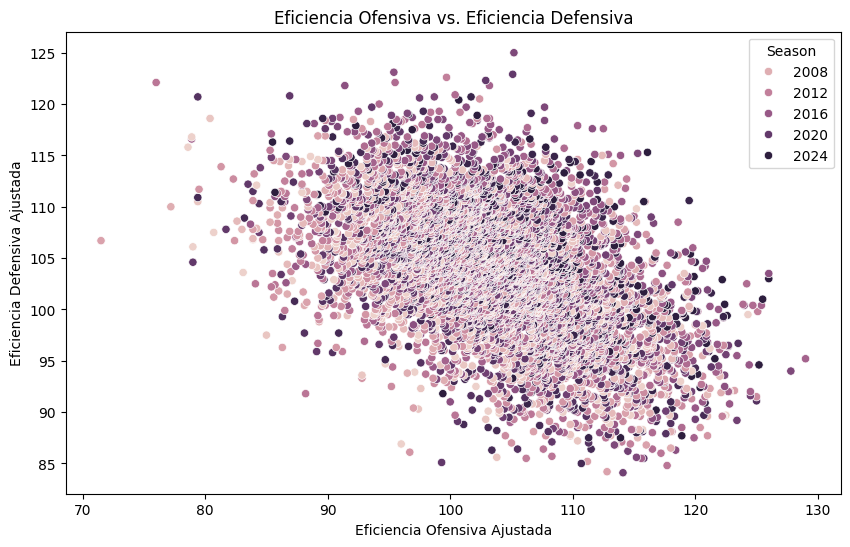

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=March_Madness_df, x='Adjusted Offensive Efficiency', y='Adjusted Defensive Efficiency', hue='Season')

plt.title('Eficiencia Ofensiva vs. Eficiencia Defensiva')
plt.xlabel('Eficiencia Ofensiva Ajustada')
plt.ylabel('Eficiencia Defensiva Ajustada')
plt.legend(title='Season', loc='upper right')
plt.show()


Otra opción de ver que realmente es bastante pareja la eficiencia entre años, es ver esta nube de puntos, en general muy concentrados.

In [23]:
# Visto esta tendencia nos vamos a centrar en la diferencia, el Net Rating
# Equipos con las mayores diferencias
Top_net = March_Madness_df.sort_values('Net Rating', ascending=False).head(10)

print("Equipos con mayor diferencia positiva en eficiencia (Ofensiva - Defensiva):")
print(Top_net[['Season', 'Team Name', 'Net Rating']])

Equipos con mayor diferencia positiva en eficiencia (Ofensiva - Defensiva):
   Season       Team Name  Net Rating
0    2019        Virginia        34.2
1    2021          Baylor        33.9
2    2015       Wisconsin        33.8
3    2018       Villanova        33.8
4    2011      Ohio State        33.5
5    2010            Duke        33.3
6    2013      Louisville        32.9
7    2019         Gonzaga        32.9
8    2005  North Carolina        32.8
9    2005        Illinois        32.7


In [24]:
# Visto esta tendencia nos vamos a centrar en la diferencia, el Net Rating
# Equipos con las mayores diferencias
Top_net = March_Madness_df.sort_values('Net Rating', ascending=True).head(10)

print("Equipos con mayor diferencia negativa en eficiencia (Ofensiva - Defensiva):")
print(Top_net[['Season', 'Team Name', 'Net Rating']])

Equipos con mayor diferencia negativa en eficiencia (Ofensiva - Defensiva):
      Season                 Team Name  Net Rating
6965    2013                 Grambling       -46.1
6964    2021  Mississippi Valley State       -41.3
6963    2006          Maryland-Eastern       -38.2
6962    2005          Maryland-Eastern       -37.9
6961    2015                 Grambling       -37.7
6960    2005                      NJIT       -37.2
6959    2009                      NJIT       -35.2
6958    2020             Chicago State       -33.9
6957    2008                      NJIT       -32.8
6956    2010              Alcorn State       -32.6


In [25]:
# Encontrar conferencias que están en ambos top 10
Mejores_Equipos = pd.merge(Top_off.nlargest(10, 'Adjusted Offensive Efficiency'),Top_def.nsmallest(10, 'Adjusted Defensive Efficiency') , on='Team Name')

print("Las conferencias que se encuentran tanto en el top 10 de eficiencia ofensiva como defensiva son:")
print(Mejores_Equipos)

Las conferencias que se encuentran tanto en el top 10 de eficiencia ofensiva como defensiva son:
Empty DataFrame
Columns: [Season_x, Team Name, Conference_x, Adjusted Temo_x, Adjusted Offensive Efficiency_x, Adjusted Defensive Efficiency_x, Avg Possession Length (Offense)_x, Avg Possession Length (Defense)_x, eFGPct_x, TOPct_x, ORPct_x, OffFT_x, DefFT_x, Tempo_x, AdjTempo_x, OE_x, AdjOE_x, DE_x, AdjDE_x, AdjEM_x, FG2Pct_x, FG3Pct_x, FTPct_x, BlockPct_x, OppFG2Pct_x, OppFG3Pct_x, OppFTPct_x, OppBlockPct_x, DFP_x, AvgHeight_x, CenterHeight_x, PFHeight_x, SFHeight_x, SGHeight_x, PGHeight_x, EffectiveHeight_x, Experience_x, Bench_x, CenterOR_x, PFOR_x, SFOR_x, SGOR_x, PGOR_x, CenterDR_x, PFDR_x, SFDR_x, SGDR_x, PGDR_x, Net Rating_x, Is_Champion_x, Is_Champion_Num_x, Season_y, Conference_y, Adjusted Temo_y, Adjusted Offensive Efficiency_y, Adjusted Defensive Efficiency_y, Avg Possession Length (Offense)_y, Avg Possession Length (Defense)_y, eFGPct_y, TOPct_y, ORPct_y, OffFT_y, DefFT_y, Temp

In [26]:
# Equipos en el Top30
# Equipos con mejor eficiencia ofensiva
Top_off_v2 = March_Madness_df.sort_values('Adjusted Offensive Efficiency', ascending=False).head(30)

# Equipos con mejor eficiencia defensiva
Top_def_v2 = March_Madness_df.sort_values('Adjusted Defensive Efficiency').nsmallest(30, 'Adjusted Defensive Efficiency')

# Encontrar equipos que están en el top 30 tanto en eficiencia ofensiva como en defensiva
Mejores_Equipos = pd.merge(Top_off_v2, Top_def_v2, on='Team Name')

# Seleccionar solo el nombre del equipo, año y conferencia
Mejores_Equipos_info = Mejores_Equipos[['Team Name', 'Season_x', 'Conference_x', 'Net Rating_x']]

# Renombrar columnas para mayor claridad
Mejores_Equipos_info.columns = ['Team Name', 'Season', 'Conference','Net Rating']

# Eliminar duplicados
Mejores_Equipos_info = Mejores_Equipos_info.drop_duplicates()

print("Las conferencias que se encuentran tanto en el top 30 de eficiencia ofensiva como defensiva son:")
print(Mejores_Equipos_info.sort_values('Season'))

Las conferencias que se encuentran tanto en el top 30 de eficiencia ofensiva como defensiva son:
         Team Name  Season                       Conference  Net Rating
10         Florida    2007    Southeastern Conference (SEC)        30.8
4         Michigan    2014      Big Ten Conference (Big 10)        23.4
0        Wisconsin    2015      Big Ten Conference (Big 10)        33.8
9   Michigan State    2016      Big Ten Conference (Big 10)        27.9
2          Gonzaga    2019      West Coast Conference (WCC)        32.9
6         Virginia    2019  Atlantic Coast Conference (ACC)        34.2
11       Tennessee    2019    Southeastern Conference (SEC)        26.2
5             Iowa    2021      Big Ten Conference (Big 10)        26.8
3          Gonzaga    2024      West Coast Conference (WCC)        23.2


Si vemos la lista de campeones de los últimos años, equipos que hayan ganado estando en ambas listas, tenemos Florida y Virginia.
Se podría decir que estos son los equipos más completos de la historia de la liga.
Más adelante analizaremos que han hecho estos equipos.

Vamos a analizar si la conferencia influye en las capacidades ofensivas o defensivas.

In [27]:
# Agrupamos por conferencia y calculamos la media de la eficiencia ofensiva y defensiva
conference_stats = March_Madness_df.groupby('Conference')[['Adjusted Offensive Efficiency', 'Adjusted Defensive Efficiency', 'Net Rating']].mean()

# Ver los primeros resultados
print(conference_stats)


                                           Adjusted Offensive Efficiency  \
Conference                                                                 
American Athletic Conference (AAC)                            104.555245   
American East Conference (AmEast)                              98.668421   
Atlantic 10 Conference (A-10)                                 105.692182   
Atlantic Coast Conference (ACC)                               111.615512   
Atlantic Sun Conference (ASUN)                                100.344103   
Big 12 Conference                                             110.902143   
Big East Conference                                           111.070776   
Big Sky Conference                                            102.037561   
Big South Conference                                           99.573770   
Big Ten Conference (Big 10)                                   110.882562   
Big West Conference (BWC)                                     101.545894   
Coastal Athl

<ipython-input-28-6e4544326ca3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conference_stats, x='Adjusted Offensive Efficiency', y='Conference', palette='Blues_d')
<ipython-input-28-6e4544326ca3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conference_stats, x='Adjusted Defensive Efficiency', y='Conference', palette='Reds_d')
<ipython-input-28-6e4544326ca3>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conference_stats, x='Net Rating', y='Conference', palette='Greens_d')


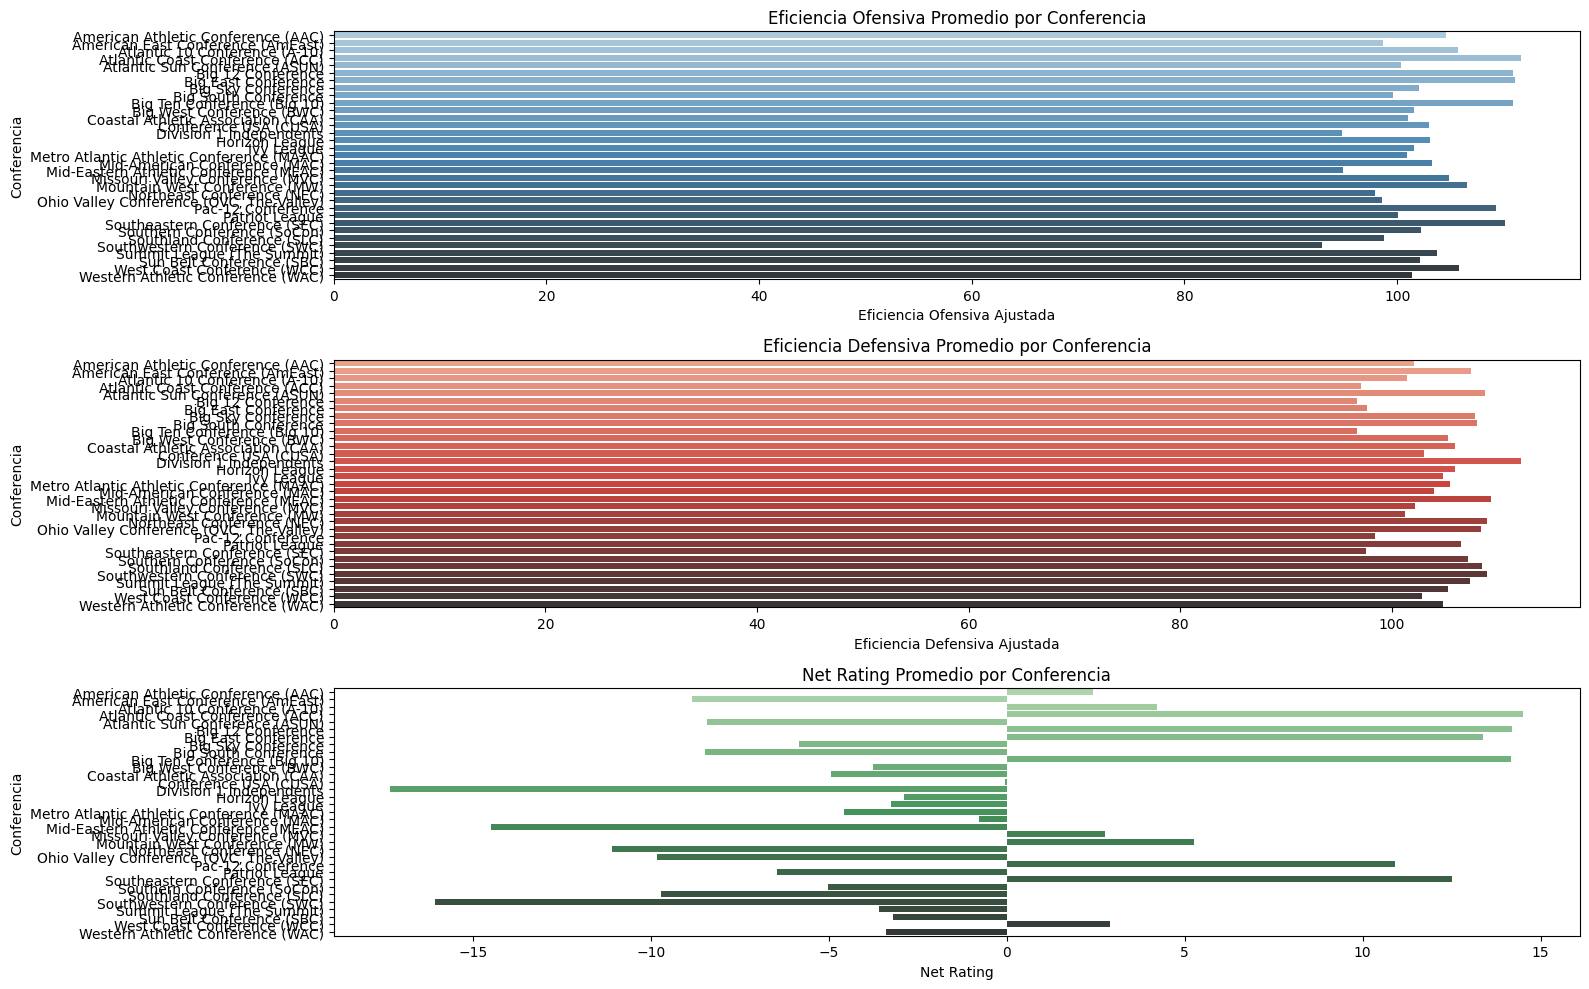

In [28]:
# Configurar el tamaño de la gráfica
plt.figure(figsize=(16, 10))

# Crear un gráfico de barras para la eficiencia ofensiva
plt.subplot(3, 1, 1)
sns.barplot(data=conference_stats, x='Adjusted Offensive Efficiency', y='Conference', palette='Blues_d')
plt.title('Eficiencia Ofensiva Promedio por Conferencia')
plt.xlabel('Eficiencia Ofensiva Ajustada')
plt.ylabel('Conferencia')

# Crear un gráfico de barras para la eficiencia defensiva
plt.subplot(3, 1, 2)
sns.barplot(data=conference_stats, x='Adjusted Defensive Efficiency', y='Conference', palette='Reds_d')
plt.title('Eficiencia Defensiva Promedio por Conferencia')
plt.xlabel('Eficiencia Defensiva Ajustada')
plt.ylabel('Conferencia')

# Crear un gráfico de barras para la eficiencia defensiva
plt.subplot(3, 1, 3)
sns.barplot(data=conference_stats, x='Net Rating', y='Conference', palette='Greens_d')
plt.title('Net Rating Promedio por Conferencia')
plt.xlabel('Net Rating')
plt.ylabel('Conferencia')

# Ajustar el layout para que no se sobrepongan los gráficos
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [29]:
print("Las conferencias con más eficiencia ofensiva :",conference_stats.nlargest(5, 'Adjusted Offensive Efficiency'))
print("Las conferencias con más eficiencia defensiva :",conference_stats.nlargest(5, 'Adjusted Defensive Efficiency'))
print("Las conferencias con un valor de Net Rating positivo son: ",conference_stats[conference_stats['Net Rating'] > 0])

Las conferencias con más eficiencia ofensiva :                                  Adjusted Offensive Efficiency  \
Conference                                                       
Atlantic Coast Conference (ACC)                     111.615512   
Big East Conference                                 111.070776   
Big 12 Conference                                   110.902143   
Big Ten Conference (Big 10)                         110.882562   
Southeastern Conference (SEC)                       110.107143   

                                 Adjusted Defensive Efficiency  Net Rating  
Conference                                                                  
Atlantic Coast Conference (ACC)                      97.099010   14.516502  
Big East Conference                                  97.678082   13.392694  
Big 12 Conference                                    96.711071   14.191071  
Big Ten Conference (Big 10)                          96.699644   14.182918  
Southeastern Conference (SEC

In [30]:
# Encontrar conferencias que están en ambos top 10
Mejores_Conferencias = pd.merge(conference_stats.nlargest(3, 'Adjusted Offensive Efficiency'),conference_stats.nsmallest(3, 'Adjusted Defensive Efficiency') , on='Conference')
print("Las conferencias que se encuentran tanto en el top 10 de eficiencia ofensiva como defensiva son:")
print(Mejores_Conferencias['Net Rating_x'])

Las conferencias que se encuentran tanto en el top 10 de eficiencia ofensiva como defensiva son:
Conference
Atlantic Coast Conference (ACC)    14.516502
Big 12 Conference                  14.191071
Name: Net Rating_x, dtype: float64


Estas son las dos conferencias que se encuentran en el top de cada categoría. Son las dos con mejor Net Rating.

In [31]:
# Vamos a pasar a ver que equipos de nuestra lista han llegado a la final
finalists_stats = pd.merge(March_Madness_df, Finalistas_df, on=['Team Name', 'Season'])
print(finalists_stats.sort_values('Net Rating', ascending=False) )

NameError: name 'Finalistas_df' is not defined

In [ ]:
# Vamos a ver que equipos están el top de equipos
finalists_top = pd.merge(Mejores_Equipos_info, Finalistas_df, on=['Team Name', 'Season'])
print(finalists_top)

In [ ]:
# Vamos a ver que equipos están el top de equipos
finalists_top = pd.merge(March_Madness_df.sort_values('Net Rating', ascending=False).head(30), Finalistas_df, on=['Team Name', 'Season'])
print(finalists_top)

In [ ]:
# De los mejores equipos según el Net Rating, cuantos si han sido campeones
Campeones_Top = finalists_top[finalists_top['Is_Champion'] == 'Si']
print(Campeones_Top)

In [ ]:
# Vamos a ver los ORs por posición
positions = ['PG', 'SG', 'SF', 'PF', 'Center']
Campeones_Top['Team_Season'] = Campeones_Top['Team Name'] + '-' + Campeones_Top['Season'].astype(str)
# Crear una figura y un conjunto de subgráficos
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, position in enumerate(positions):
    row, col = divmod(i, 3)

    # Filtrar las columnas relevantes para OR y DR de la posición
    or_column = f'{position}OR'
    dr_column = f'{position}DR'

    # Crear gráfico de barras para OR y DR
    Campeones_Top.plot(kind='bar', x='Team_Season', y=[or_column, dr_column], ax=axes[row, col], color=['blue', 'orange'])

    # Título para cada gráfico
    axes[row, col].set_title(f'{position} - Offensive & Defensive Ratings')
    axes[row, col].set_ylabel('Rating')
    axes[row, col].set_xlabel('Team_Season')
    axes[row, col].set_ylim(0, 50)


# Calcular la media de los titulares para cada equipo
Campeones_Top['Media_OR'] = Campeones_Top[[f'{pos}OR' for pos in positions]].sum(axis=1)
Campeones_Top['Media_DR'] = Campeones_Top[[f'{pos}DR' for pos in positions]].sum(axis=1)

# Graficar la media de los titulares en el subgráfico vacío
Campeones_Top.plot(kind='bar', x='Team_Season', y=['Bench'], ax=axes[1, 2], color=['green'])

# Título para la gráfica de la media de los titulares
axes[1, 2].set_title('Bench - Offensive & Defensive Ratings')
axes[1, 2].set_ylabel('Rating')
axes[1, 2].set_xlabel('Team Season')
axes[1, 2].set_ylim(0, 50)

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el conjunto de gráficos
plt.show()

Es curioso ver como el peso tanto ofensivo como defensivo cae más en los jugadores como el Ala-Pivot o el Pivot, esto se debe a que sus tiros son de un % mayor.

In [ ]:
# Vamos a ver gráficos similares pero con las estadísticas principales
